In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename='/Users/hp/Documents/SafeToday/input/ravdess-emotional-speech-audio/Actor_14/03-01-03-01-02-02-14.wav'

In [3]:
import IPython.display as ipd

In [4]:
plt.figure(figsize=(14,5))
ipd.Audio(filename)

<Figure size 1400x500 with 0 Axes>

In [5]:
import librosa
import librosa.display
import numpy as np

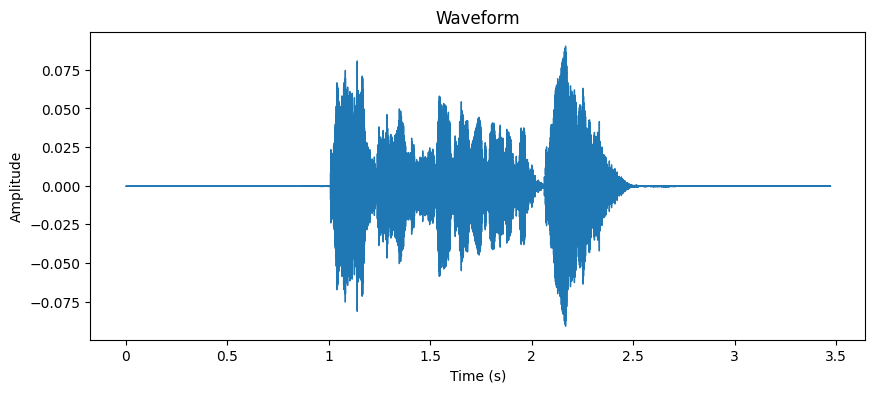

In [6]:
data, sample_rate= librosa.load(filename)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
#default sample rate when reading with librosa
sample_rate

22050

mono channel and stereo channel, librosa converts both to mono (ie it converges the signals)

In [8]:
data

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -7.8462745e-06,  2.1188921e-06,  0.0000000e+00], dtype=float32)

the values are normalised between -1 and 1

In [9]:
from scipy.io import wavfile as wav
wave_sr, wave_audio= wav.read(filename)

/var/folders/p3/8_y79yt52njc0gxr86x8gbtw0000gn/T/ipykernel_12861/4039996855.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wave_sr, wave_audio= wav.read(filename)


In [10]:
wave_sr

48000

In [11]:
wave_audio

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [12]:
import pandas as pd
df = pd.read_csv('../input/ravdess/data .csv')

/Users/hp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
df['emotion'].value_counts()

emotion
female_fearful    296
female_sad        296
female_happy      296
female_angry      296
male_angry        156
male_happy        156
male_sad          156
male_fearful      156
female_calm        96
male_calm          96
Name: count, dtype: int64

In [14]:
mfcc=librosa.feature.mfcc(y=data, sr= sample_rate, n_mfcc= 40)
print(mfcc.shape)

(40, 150)


In [15]:
mfcc

array([[-7.7304785e+02, -7.7304785e+02, -7.7304785e+02, ...,
        -7.7278033e+02, -7.7267505e+02, -7.7304785e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.7258524e-01,  5.1538706e-01,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.5556906e-01,  4.8040673e-01,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.3700424e-01,  3.2015406e-02,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.2082653e-01,  6.2618852e-03,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.9509339e-01, -1.3005093e-02,  0.0000000e+00]], dtype=float32)

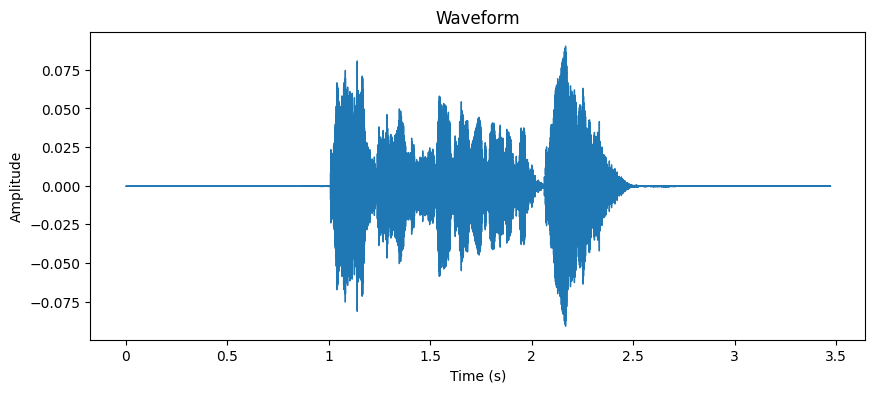

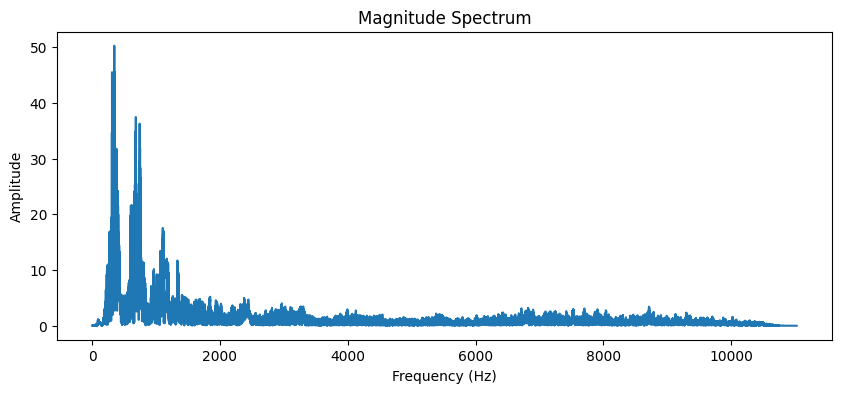

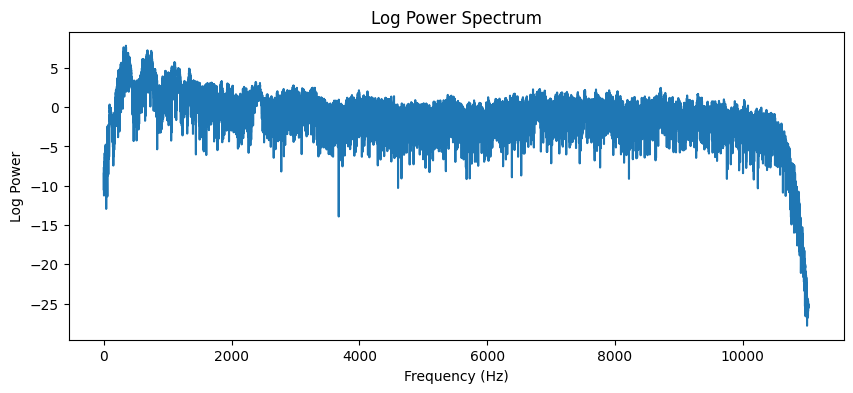

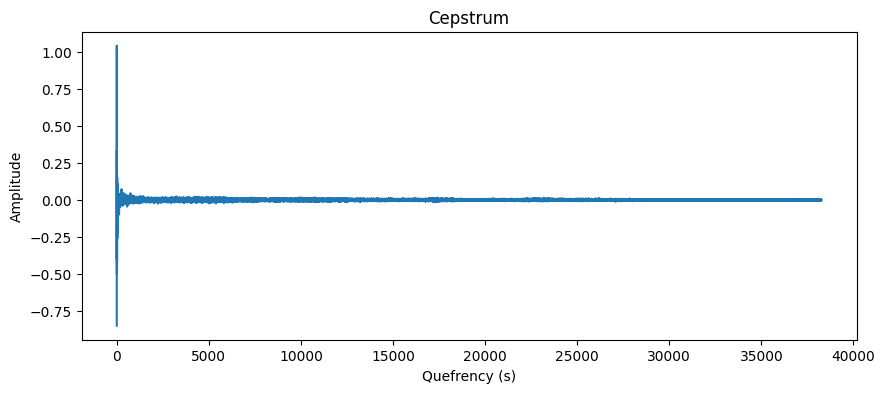

In [16]:
# Plot the original audio waveform

plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Step 1: Compute the Discrete Fourier Transform (DFT)
spectrum = np.fft.fft(data)
freqs = np.fft.fftfreq(len(spectrum), 1 / sample_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(spectrum)[:len(freqs)//2])  # Plot only the positive frequencies
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Step 2: Compute the Log Power Spectrum
log_power_spectrum = np.log(np.abs(spectrum)**2)

# Plot the log power spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], log_power_spectrum[:len(freqs)//2])
plt.title('Log Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Power')
plt.show()

# Step 3: Compute the Cepstrum using Inverse Fourier Transform
cepstrum = np.fft.ifft(log_power_spectrum).real

# Plot the cepstrum
plt.figure(figsize=(10, 4))
plt.plot(cepstrum[:len(cepstrum)//2])  # Plot the quefrency (cepstral domain)
plt.title('Cepstrum')
plt.xlabel('Quefrency (s)')
plt.ylabel('Amplitude')
plt.show()

time domain-> frequency domain -> smth that resembles the frequency domain but is not that (quefrency)

the peak is the first rhamonic.
If no such peak exists, the signal may lack a strong periodic structure, meaning no clear rahmonics.

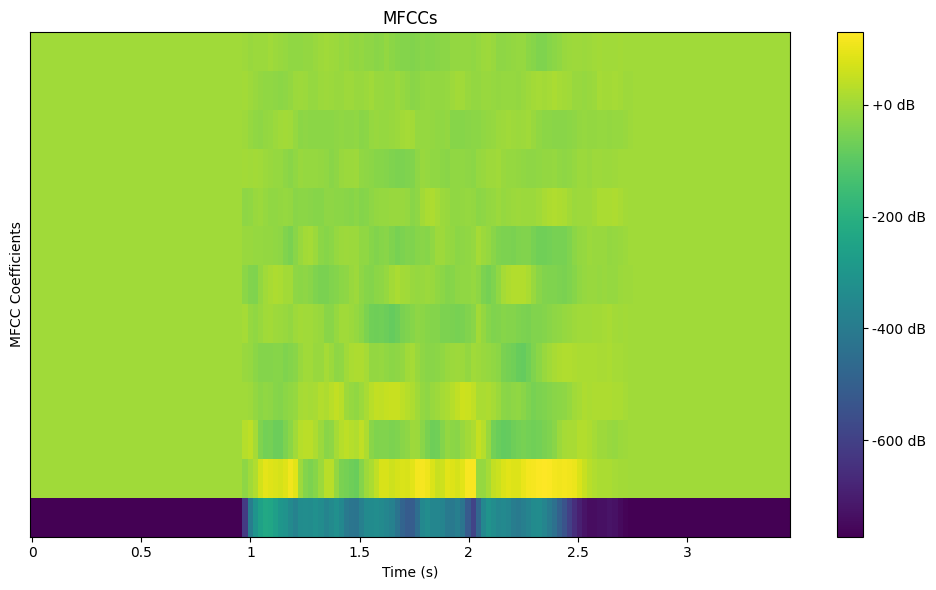

In [20]:
# Compute MFCCs
n_mfcc = 13  # Number of MFCCs to compute
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate, hop_length=512, cmap='viridis')
plt.colorbar(format="%+2.0f dB")
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.tight_layout()
plt.show()